## Observations and Insights 

In [ ]:
# Based on the calculated total tumor volume displayed in the box plots below, 
# Capomulin and Ramicane seem to be more effective than Infubinol and Ceftamine.

# The data collected from this study is very statistically significant becaue we only observe one outlier.

# Based on the strong r-correlation (.84) between mouse weight and tumor volume, 
# drug regimens are less effective on heavier mice.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [30]:
# Read and display the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
223,w584,Infubinol,Male,3,29
173,q119,Ketapril,Male,17,30
50,a251,Infubinol,Female,21,25
157,o331,Ketapril,Male,24,30
113,i477,Placebo,Female,3,30
153,n923,Ketapril,Male,19,30
234,x773,Placebo,Female,21,30
104,g558,Propriva,Male,8,29
182,r604,Naftisol,Male,7,30
136,l661,Ceftamin,Male,18,26


In [31]:
# Read and display the study results
study_results = pd.read_csv(study_results_path)
study_results.sample(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
195,k210,0,45.000000,0
1677,w422,40,63.072585,4
673,c264,10,49.026592,0
1541,f345,35,56.523327,1
1252,i334,25,38.248817,1
237,w914,0,45.000000,0
293,c264,5,45.791704,0
975,b313,20,53.979680,1
54,r701,0,45.000000,0
1215,i635,25,52.928823,1


In [32]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_study.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
902,g570,Propriva,Male,16,29,40,68.525856,2
1234,n763,Placebo,Female,16,25,25,53.405871,2
1610,v295,Naftisol,Female,2,27,20,55.731375,3
345,v923,Capomulin,Female,19,21,20,39.648296,0
1479,r850,Placebo,Male,5,30,15,50.218605,1
157,t565,Capomulin,Female,20,17,10,46.749006,0
1632,v719,Infubinol,Female,17,30,20,54.048608,1
1644,v835,Naftisol,Male,7,29,15,50.545206,1
512,a457,Ketapril,Female,11,30,5,47.462891,0
906,g867,Stelasyn,Female,9,25,10,48.183402,0


In [33]:
# Checking the number of mice.
len(mouse_study)

1893

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_study[mouse_study.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
len(duplicate_mice)

5

In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study.drop(mouse_study[mouse_study['Mouse ID']=='g989'].index, inplace=True)
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study)

1880

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean of the tumor volume for each regimen
tumor_volume_mean = mouse_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
print(tumor_volume_mean)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64


In [39]:
# Generate a summary statistics table of median of the tumor volume for each regimen
tumor_volume_median = mouse_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
print(tumor_volume_median)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64


In [40]:
# Generate a summary statistics table of variance of the tumor volume for each regimen
tumor_volume_var = mouse_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
print(tumor_volume_var)

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64


In [41]:
# Generate a summary statistics table of standard deviation of the tumor volume for each regimen
tumor_volume_std = mouse_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
print(tumor_volume_std)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64


In [42]:
# Generate a summary statistics table of SEM of the tumor volume for each regimen
tumor_volume_sem = mouse_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
print(tumor_volume_sem)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


In [43]:
# Generate initial dataframe for summary table for summary statistics of tumor volume for each regimen
tumor_volume_summary_statistics = pd.DataFrame(tumor_volume_mean)
tumor_volume_summary_statistics = tumor_volume_summary_statistics.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Mean'})
tumor_volume_summary_statistics

,Tumor Volume Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [44]:
# Generate summary table for summary statistics of tumor volume for each regimen
tumor_volume_summary_statistics['Tumor Volume Median']=tumor_volume_median
tumor_volume_summary_statistics['Tumor Volume Variance']=tumor_volume_var
tumor_volume_summary_statistics['Tumor Volume Standard Deviation']=tumor_volume_std
tumor_volume_summary_statistics['Tumor Volume Standard Error']=tumor_volume_sem
tumor_volume_summary_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [65]:
# Pull total timepoints by drug regimen
drug_regiment_timepoints = mouse_study['Drug Regimen'].value_counts()
drug_regiment_timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Mice Count')

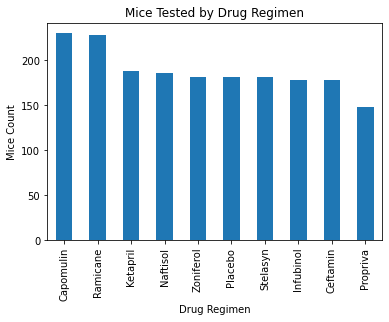

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_study_pdBarPlot = drug_regiment_timepoints.plot.bar(title='Mice Tested by Drug Regimen')

mouse_study_pdBarPlot.set_xlabel('Drug Regimen')
mouse_study_pdBarPlot.set_ylabel('Mice Count')

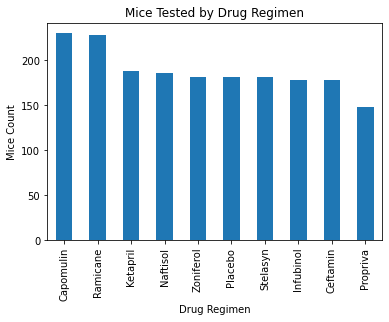

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_study_pyplot_df = pd.DataFrame(drug_regiment_timepoints)
mouse_study_pyplot_df.plot.bar(legend=False)
plt.title('Mice Tested by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.show()

In [72]:
# Pull mice sex data needed to create pie charts
mouse_study_pie_data = mouse_study.groupby('Sex').nunique()['Mouse ID']
mouse_study_pie_data

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

<AxesSubplot:title={'center':'Mice Sex Distribution'}, ylabel='Mouse ID'>

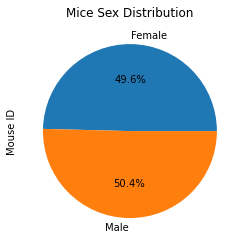

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_pie_data.plot.pie(autopct='%1.1f%%',title="Mice Sex Distribution")

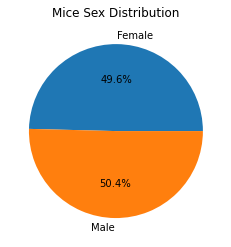

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_study_pyplot_pie_df=pd.DataFrame(mouse_study_pie_data)
plt.pie(mouse_study_pie_data, labels=mouse_study_pie_data.index, autopct='%1.1f%%')
plt.title('Mice Sex Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(mouse_study.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
max_timepoint

# Merge max timepoint onto data_df
merged_mousedata = pd.merge(mouse_study, max_timepoint, on='Mouse ID')
merged_mousedata.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
1245,o287,Ceftamin,Male,2,28,35,55.118290,4,45
105,n364,Ramicane,Male,4,17,0,45.000000,0,45
220,w914,Capomulin,Male,24,21,25,40.291917,0,45
56,s508,Ramicane,Male,1,17,30,35.474022,0,45
1001,j984,Stelasyn,Female,2,30,0,45.000000,0,45
659,c302,Zoniferol,Female,10,29,5,47.690680,1,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45
1123,l700,Naftisol,Female,18,27,15,49.040225,1,45
1033,k483,Infubinol,Female,20,30,10,50.296041,1,45
1397,q511,Zoniferol,Female,2,28,15,52.133081,0,45


In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Calculate the IQR and quantitatively determine if there are any potential outliers:

# Place Capomulin, Ramicane, Infubinol, and Ceftamin drug regiments into a list
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Put treatments into a list for for loop (and later for plot labels)
for drug in drug_regimens:

    # Create initial df to begin pulling total tumor volume by mouse from datafame of last (greatest) timepoint for each mouse
    volume_df = merged_mousedata.loc[merged_mousedata['Drug Regimen']==drug]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume_df = volume_df.loc[volume_df['Timepoint'] == volume_df['Max Timepoint']]
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively determine if there are any potential outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


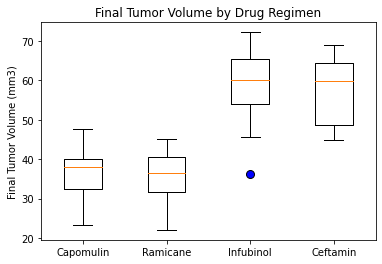

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Highlight outliers
flierprops = dict(marker='o', markerfacecolor='blue', markersize=8, markeredgecolor='black')

# Plot box plot of all four regiments in one visual
plt.boxplot(drug_values, flierprops=flierprops)

plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

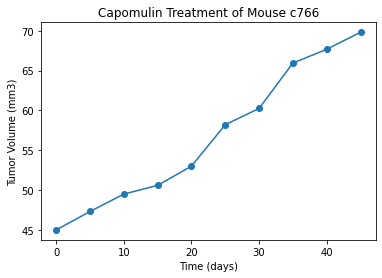

In [54]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
capomulin_data_lp = mouse_study.loc[mouse_study['Mouse ID'] == 'c766']

# Plot a line chart with the timepoint values on the x-axis and the tumor volume values on the y-axis
plt.plot(capomulin_data_lp['Timepoint'], capomulin_data_lp['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse c766")

plt.show()

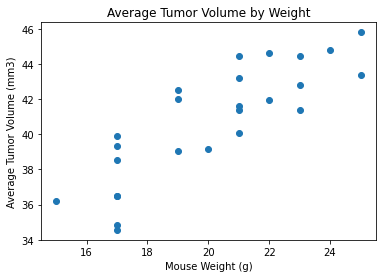

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data_sp = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_tumor_vol = pd.DataFrame(capomulin_data_sp.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

# Merge average tumor volume onto data_df and drop duplicates
avg_tumor_vol = pd.merge(capomulin_data_sp, avg_tumor_vol, on='Mouse ID')
final_avg_tumor_vol = avg_tumor_vol[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_tumor_vol

x = final_avg_tumor_vol['Weight (g)']
y = final_avg_tumor_vol['Average Tumor Volume']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The correlation coefficient between weight and average tumor volume on the Capomulin regimen is 0.84.


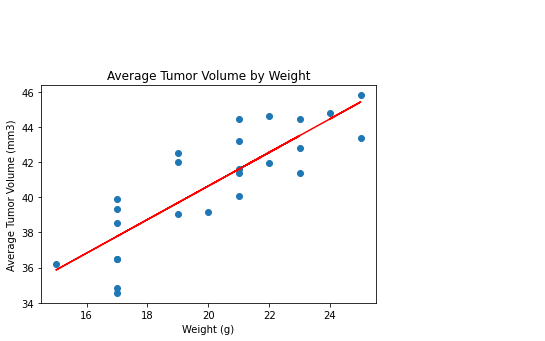

In [56]:
capomulin_data_sp = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = pd.DataFrame(capomulin_data_sp.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_tumor_vol = pd.merge(capomulin_data_sp, avg_tumor_vol, on='Mouse ID')
final_avg_tumor_vol = avg_tumor_vol[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_tumor_vol
x = final_avg_tumor_vol['Weight (g)']
y = final_avg_tumor_vol['Average Tumor Volume']

# Calculate the correlation coefficient between weight and average tumor volume
correlation = st.pearsonr(x,y)
print(f'The correlation coefficient between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.')

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
line_eq

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,'r-')

# Annotate linear regression
plt.annotate(line_eq,(25,50),fontsize=20,color='red')

# Add labels and title to plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()